In [1]:
import gensim 
from gensim.models import Word2Vec
import warnings

warnings.filterwarnings(action = 'ignore') 
# Create CBOW model 
word2Vec_model = gensim.models.KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin', binary=True) 

In [2]:
   
from nltk.corpus import  wordnet
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import sent_tokenize, word_tokenize 
import string
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from string import digits
from nltk.corpus import wordnet
import time

In [3]:
def intersection(lst1, lst2):
    return list(set(lst1) & set(lst2))

In [4]:
def update_stop_words():
    stop_words = set(stopwords.words('english'))
    #we can use word generator 
    php_stop_words = ["a", "about", "above", "above", "across", "after", 
                                       "afterwards", "again", "against", "all", "almost", "alone", 
                                       "along", "already", "also","although","always","am","among", 
                                       "amongst", "amoungst", "amount",  "an", "and", "another", "any",
                                       "anyhow","anyone","anything","anyway", "anywhere", "are", "around", 
                                       "as",  "at", "back","be","became", "because","become","becomes", "becoming", 
                                       "been", "before", "beforehand", "behind", "being", "below", "beside", "besides", 
                                       "between", "beyond", "bill", "both", "bottom","but", "by", "call", "can", "cannot", 
                                       "cant", "co", "con", "could", "couldnt", "cry", "de", "describe", "detail", "do", "done", 
                                       "down", "due", "during", "each", "eg", "eight", "either", "eleven","else", "elsewhere", 
                                       "empty", "enough", "etc", "even", "ever", "every", "everyone", "everything", "everywhere",
                                       "except", "few", "fifteen", "fify", "fill", "find", "fire", "first", "five", "for",
                                       "former", "formerly", "forty", "found", "four", "from", "front", "full", "further",
                                       "get", "give", "go", "had", "has", "hasnt", "have", "he", "hence", "her", "here",
                                       "hereafter", "hereby", "herein", "hereupon", "hers", "herself", "him", "himself",
                                       "his", "how", "however", "hundred", "ie", "if", "in", "inc", "indeed", "interest",
                                       "into", "is", "it", "its", "itself", "keep", "last", "latter", "latterly", "least",
                                       "less", "ltd", "made", "many", "may", "me", "meanwhile", "might", "mill", "mine",
                                       "more", "moreover", "most", "mostly", "move", "much", "must", "my", "myself",
                                       "name", "namely", "neither", "never", "nevertheless", "next", "nine", "no",
                                       "nobody", "none", "noone", "nor", "not", "nothing", "now", "nowhere", "of",
                                       "off", "often", "on", "once", "one", "only", "onto", "or", "other", "others",
                                       "otherwise", "our", "ours", "ourselves", "out", "over", "own","part", "per",
                                       "perhaps", "please", "put", "rather", "re", "same", "see", "seem", "seemed",
                                       "seeming", "seems", "serious", "several", "she", "should", "show", "side",
                                       "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone",
                                       "something", "sometime", "sometimes", "somewhere", "still", "such", "system",
                                       "take", "ten", "than", "that", "the", "their", "them", "themselves", "then",
                                       "thence", "there", "thereafter", "thereby", "therefore", "therein", "thereupon",
                                       "these", "they", "thick", "thin", "third", "this", "those", "though", "three",
                                       "through", "throughout", "thru", "thus", "to", "together", "too", "top", "toward",
                                       "towards", "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us",
                                       "very", "via", "was", "we", "well", "were", "what", "whatever", "when", "whence",
                                       "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "whereupon",
                                       "wherever", "whether", "which", "while", "whither", "who", "whoever", "whole",
                                       "whom", "whose", "why", "will", "with", "within", "without", "would", "yet", "you",
                                       "your", "yours", "yourself", "yourselves", "the"]
    stop_words |= set(php_stop_words)
    table = str.maketrans('', '', string.punctuation)
    return stop_words, table

In [20]:
def clean_thousand_reviews(thousand_reviews, filtered_sentences, filtered_sentences_stripped, 
                          reviews_str, uncleaned_reviews, stripped_total, stop_words, table):
    for r in thousand_reviews:
        if type(r) is not str:
            continue
        word_tokens = word_tokenize(r.lower())
        for w in word_tokens:
            uncleaned_reviews.append(w)
        stripped_r = [w.translate(table) for w in word_tokens]   
        filtered_r = [w for w in stripped_r if w not in stop_words]
        while '' in filtered_r: filtered_r.remove('')
        filtered_sentences_stripped.append(filtered_r)
        filtered_sentences.append(' '.join(filtered_r))
        reviews_str += " " +  (' '.join(filtered_r)).lower()
    stripped = word_tokenize(reviews_str)
    return stripped

In [21]:
def get_max(text_l, syns):
    counter_s = 0
    max_str = ""
    for w in syns:
        if text_l.count(w) > counter_s:
            max_str = w
            counter_s = text_l.count(w)
    return max_str

In [22]:
def replace_syns(stripped):    
    synonyms = []
    upd_stripped = []

    for word in stripped:
        for syn in wordnet.synsets(word):
            for l in syn.lemmas():
                synonyms.append(l.name())

        new_syn = intersection(stripped, synonyms)
        max_s = get_max(stripped, new_syn)
        for w in new_syn:
            while w in stripped:
                stripped.remove(w)
                upd_stripped.append(max_s)
    return upd_stripped

In [23]:
def show_wordclouds(reviews, stop_words, punc_table):
    filtered_sentences = []
    filtered_sentences_stripped = []
    reviews_str = ""
    uncleaned_reviews = []
    stripped_total = []

    text = ""
    for i in range(int(len(reviews)/1000)+1):
        if i == (int(len(reviews)/1000) + 1):
            temp_stripped = clean_thousand_reviews(reviews[1000*i:], filtered_sentences, filtered_sentences_stripped, 
                                      reviews_str, uncleaned_reviews, stripped_total,stop_words, punc_table)
        else:
            temp_stripped = clean_thousand_reviews(reviews[1000*i:1000*(i+1)], filtered_sentences, filtered_sentences_stripped, 
                                  reviews_str, uncleaned_reviews, stripped_total,stop_words, punc_table)
        replaced_words = replace_syns(temp_stripped)
        stripped_total += replaced_words
        text += " " + " ".join(w for w in replaced_words)
        wordcloud = WordCloud(max_words=30, collocations=False, stopwords=stop_words, background_color="white", colormap="gist_rainbow").generate(text)

        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title('After proccessing reviews ' + str(i+1))
        plt.show(block=False)
        plt.pause(5)
        plt.close()

    return filtered_sentences, filtered_sentences_stripped

In [24]:
def get_vectors(word2Vec_model, filtered_sentences):
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(filtered_sentences)
    features = vectorizer.get_feature_names()

    # print(features)
    # print(weights)

    r_vectors = []

    for i in range(X.shape[0]):
        vec = [0]*300
        vec = np.array(vec)
        vec = vec.astype(np.float32)
        for idx, j in enumerate(X[i].indices):
    #         print(features[j], (X[i].data)[idx])
            try:
                vec += np.array(((X[i].data)[idx])*word2Vec_model[features[j]])
            except:
                continue
        if np.linalg.norm(vec) != 0:
            vec = vec/np.linalg.norm(vec)
        r_vectors.append(vec)

    return r_vectors

In [25]:
def cluster_reviews(stop_words, r_vectors, r_clusstered, filtered_sentences_stripped, n_clusters=1):
    kmeans = KMeans(n_clusters)
    df = pd.DataFrame(r_vectors)
    kmeans.fit(df)
    labels = kmeans.predict(df)

    for i in range(n_clusters): 
        r_clusstered[i] = []
    for idx,l in enumerate(labels):
        r_clusstered[l].append(filtered_sentences_stripped[idx])
    total = 0
    for i in range(n_clusters):
        total += len(r_clusstered[i])
    for i in range(n_clusters):   
        text = ''
        for lst in r_clusstered[i]:
            text += " " + ' '.join(lst)

        wordcloud = WordCloud(max_words=30, collocations=False, stopwords=stop_words, background_color="white", colormap="gist_rainbow").generate(text)

        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title('clusster %d - percenatage %f%s of total reviews'%(i+1,len(r_clusstered[i])*100/total,'%'))
        plt.show(block=False)
        plt.pause(5)
        plt.close()

Please enter the name of the Dataset:
1429_1.csv

Please enter the name of the wanted Column:
reviews.text


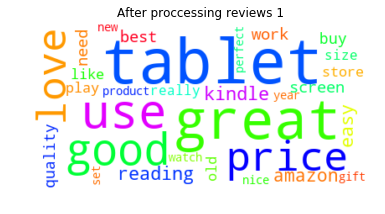

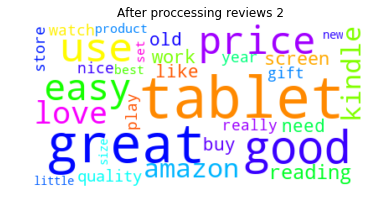

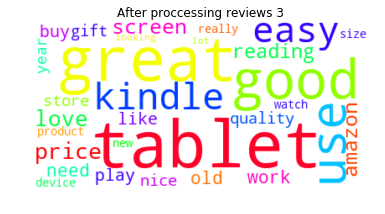

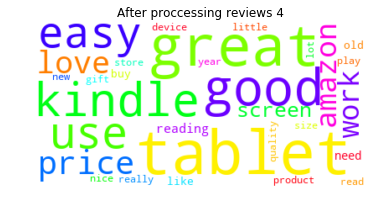

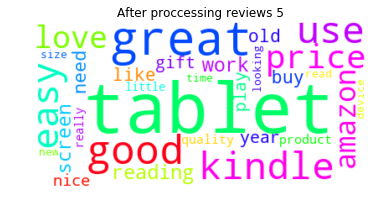

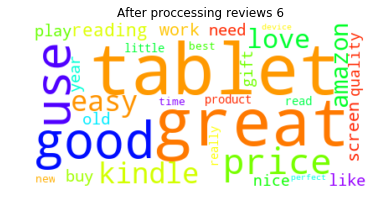

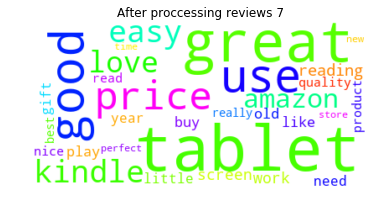

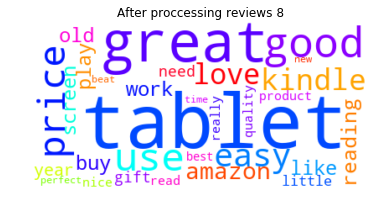

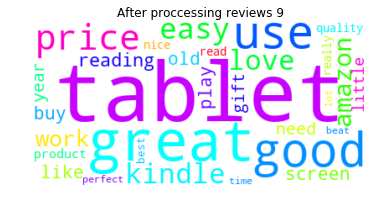

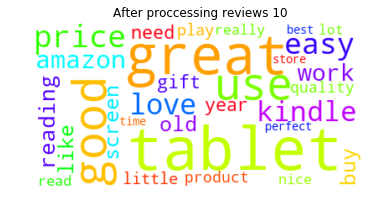

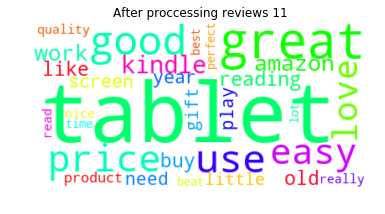

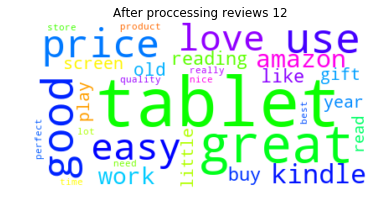

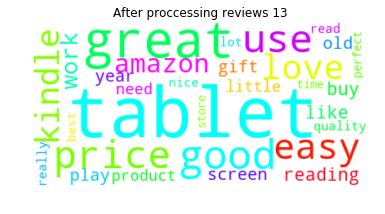

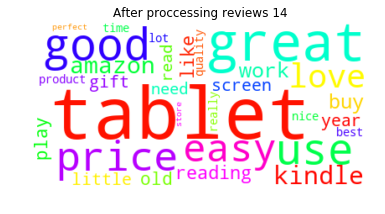

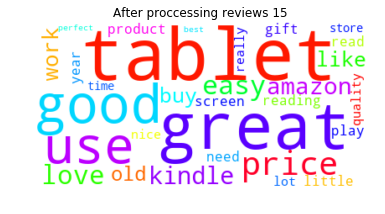

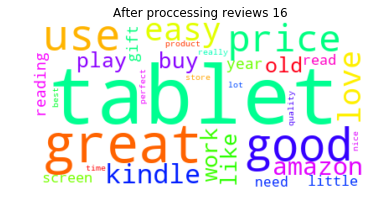

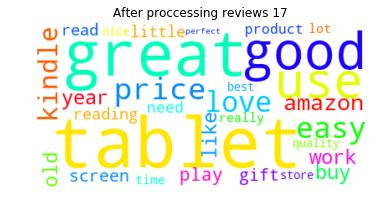

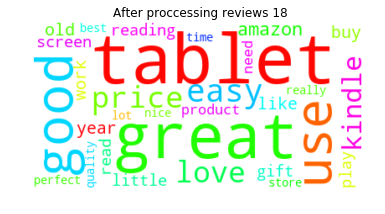

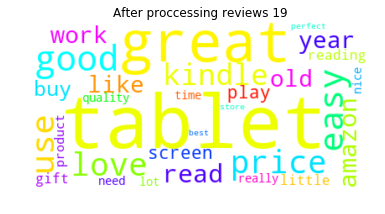

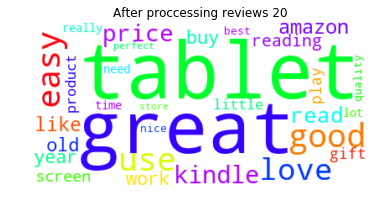

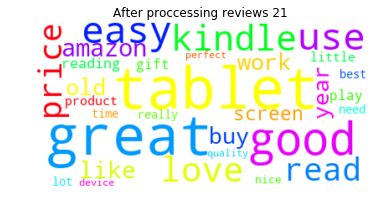

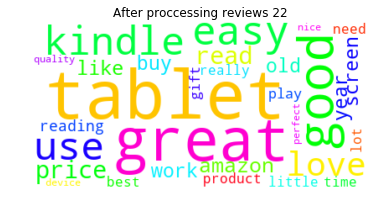

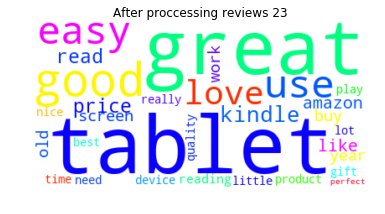

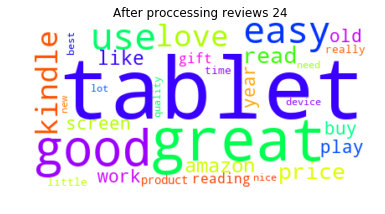

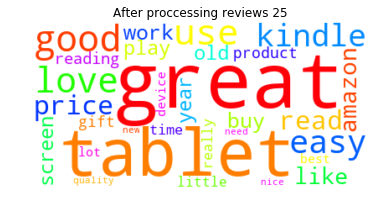

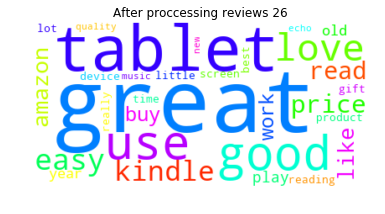

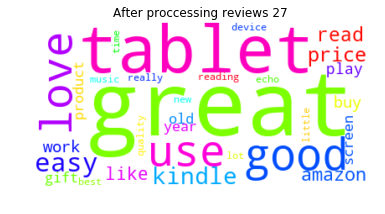

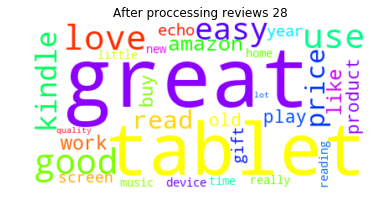

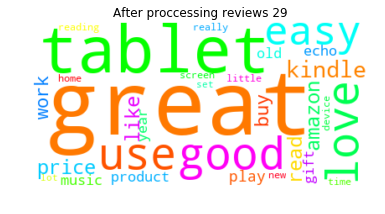

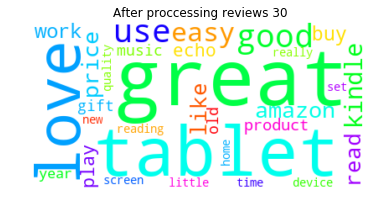

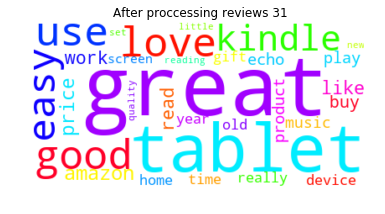

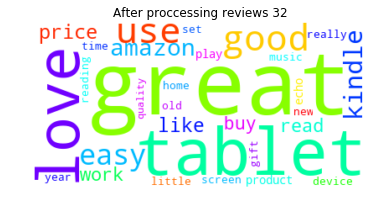

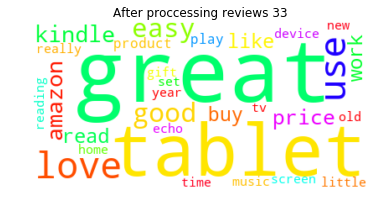

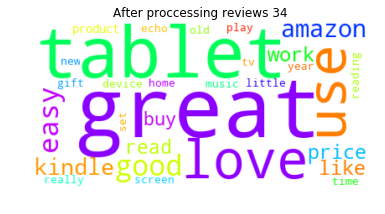

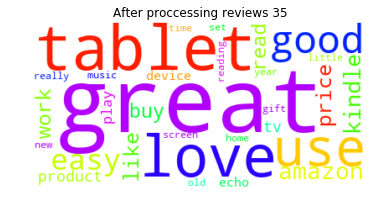

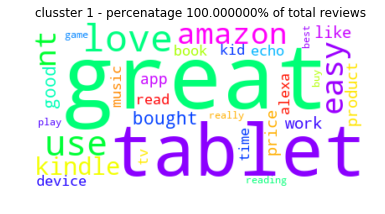

In [26]:
def get_dataset_name():
    print("Please enter the name of the Dataset:")
    dataset_name = input()
    return dataset_name


def get_column_name():
    print("\nPlease enter the name of the wanted Column:")
    column_name = input()
    return column_name


def get_reviews(dataset_name, column_name):
    df = pd.read_csv(dataset_name)
    dsf = df[column_name]
    reviews = dsf[0:]
    return reviews


def get_clusters_num():
    print("\nPlease enter number of clussters:")
    n_clusster = input()
    return n_clusster

In [ ]:
def main():
    r_clusstered = {}
    warnings.filterwarnings(action = 'ignore') 

    # Create CBOW model 
    word2Vec_model = gensim.models.KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin', binary=True)  

    dataset_name = get_dataset_name()

    column_name = get_column_name()

    reviews = get_reviews(dataset_name, column_name)

    stop_words, punc_table = update_stop_words()

    filtered_sentences, filtered_sentences_stripped = show_wordclouds(reviews ,stop_words, punc_table)

    r_vectors = get_vectors(word2Vec_model, filtered_sentences)

    n_clusster = get_clusters_num()
    cluster_reviews(stop_words, r_vectors, r_clusstered,filtered_sentences_stripped,n_clusster)	


In [ ]:
main()